In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.tools.plotting import scatter_matrix
import pprint as pp

%matplotlib inline

In [65]:
train_df = pd.read_pickle('train_df.pkl')
test_df = pd.read_pickle('test_df.pkl')

In [68]:
train_df['features']
feat_list = []


10                                                                                                         []
10000                                         [Doorman, Elevator, Fitness Center, Cats Allowed, Dogs Allowed]
100004                          [Laundry In Building, Dishwasher, Hardwood Floors, Pets Allowed Case by Case]
100007                                                                              [Hardwood Floors, No Fee]
100013                                                                                              [Pre-War]
100014                                                                                                     []
100016                     [prewar, elevator, Dogs Allowed, Cats Allowed, LOWRISE, SIMPLEX, HARDWOOD, No Fee]
100020     [Doorman, Elevator, Pre-War, Terrace, Laundry in Unit, Dishwasher, Hardwood Floors, Outdoor Space]
100026                                            [Cats Allowed, Dogs Allowed, Elevator, Laundry In Building]
100027    

In [66]:
train_df.describe()

,bathrooms,bedrooms,building_id,display_address,latitude,listing_id,longitude,manager_id,price,street_address,num_photos,num_features,num_description_words,created_year,created_month,created_day,created_hour
count,49352.00000,49352.000000,49352.000000,49352.000000,49352.000000,4.935200e+04,49352.000000,49352.000000,4.935200e+04,49352.000000,49352.000000,49352.000000,49352.000000,49352.0,49352.000000,49352.000000,49352.000000
mean,1.21218,1.541640,4959.291538,11017.775734,40.741545,7.024055e+06,-73.955716,2246.592438,3.830174e+03,12627.174826,5.606946,5.428473,90.138272,2016.0,5.014852,15.206881,4.764690
std,0.50142,1.115018,3736.656733,3572.644127,0.638535,1.262746e+05,1.177912,1270.470326,2.206687e+04,7299.636683,3.632283,3.923411,59.394230,0.0,0.824442,8.280749,4.190298
min,0.00000,0.000000,0.000000,0.000000,0.000000,6.811957e+06,-118.271000,0.000000,4.300000e+01,0.000000,0.000000,0.000000,1.000000,2016.0,4.000000,1.000000,0.000000
25%,1.00000,1.000000,1210.000000,9521.000000,40.728300,6.915888e+06,-73.991700,1116.750000,2.500000e+03,6419.000000,4.000000,2.000000,50.000000,2016.0,4.000000,8.000000,2.000000
50%,1.00000,1.000000,4976.500000,11082.000000,40.751800,7.021070e+06,-73.977900,2236.000000,3.150000e+03,12784.000000,5.000000,5.000000,83.000000,2016.0,5.000000,15.000000,3.000000
75%,1.00000,2.000000,8178.000000,14097.250000,40.774300,7.128733e+06,-73.954800,3438.000000,4.100000e+03,18979.000000,7.000000,8.000000,120.000000,2016.0,6.000000,22.000000,5.000000
max,10.00000,8.000000,11633.000000,16066.000000,44.883500,7.753784e+06,0.000000,4397.000000,4.490000e+06,25765.000000,68.000000,39.000000,667.000000,2016.0,6.000000,31.000000,23.000000


In [67]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 10 to 99994
Data columns (total 22 columns):
bathrooms                49352 non-null float64
bedrooms                 49352 non-null int64
building_id              49352 non-null int64
created                  49352 non-null datetime64[ns]
description              49352 non-null object
display_address          49352 non-null int64
features                 49352 non-null object
interest_level           49352 non-null object
latitude                 49352 non-null float64
listing_id               49352 non-null int64
longitude                49352 non-null float64
manager_id               49352 non-null int64
photos                   49352 non-null object
price                    49352 non-null int64
street_address           49352 non-null int64
num_photos               49352 non-null int64
num_features             49352 non-null int64
num_description_words    49352 non-null int64
created_year             49352 non-null int

In [10]:
features_to_use = ['bathrooms',
 'bedrooms',
 'latitude',
 'longitude',
 'price',
 'num_photos',
 'num_features',
 'num_description_words',
 'created_year',
 'created_month',
 'created_day',
 'listing_id',
 'created_hour',
 'display_address',
 'manager_id',
 'building_id',
 'street_address']

In [20]:
target_num_map = {'high':0, 'medium':1, 'low':2}
train_df['response'] = np.array(train_df['interest_level'].apply(lambda x: target_num_map[x]))

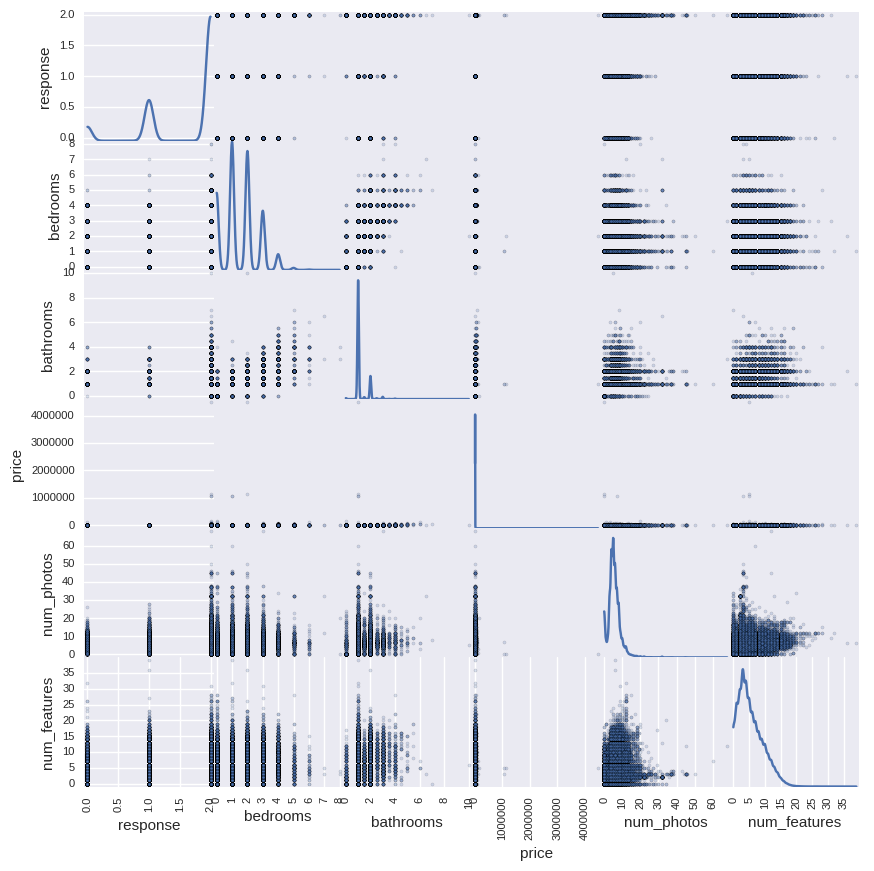

In [23]:
scatter_matrix(train_df[['response','bedrooms','bathrooms','price','num_photos','num_features']] , alpha=0.2, figsize=(10, 10), diagonal='kde');

In [51]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

for i in range(50):
    print(df_train.iloc[i,6])


Doorman Elevator Fitness_Center Cats_Allowed Dogs_Allowed
Laundry_In_Building Dishwasher Hardwood_Floors Pets_Allowed_Case_by_Case
Hardwood_Floors No_Fee
Pre-War

prewar elevator Dogs_Allowed Cats_Allowed LOWRISE SIMPLEX HARDWOOD No_Fee
Doorman Elevator Pre-War Terrace Laundry_in_Unit Dishwasher Hardwood_Floors Outdoor_Space
Cats_Allowed Dogs_Allowed Elevator Laundry_In_Building
Dishwasher Hardwood_Floors

prewar dishwasher HIGHRISE ROOFDECK EAT_IN_KITCHEN SIMPLEX HARDWOOD
Doorman Elevator Laundry_in_Building No_Fee
Swimming_Pool Doorman Fitness_Center No_Fee Dogs_Allowed Cats_Allowed
Elevator Multi-Level Laundry_in_Building Dishwasher Hardwood_Floors
Doorman Elevator Fitness_Center Laundry_in_Building No_Fee
Hardwood_Floors
prewar LOWRISE EAT_IN_KITCHEN SIMPLEX HARDWOOD
No_Fee Cats_Allowed Dogs_Allowed
Cats_Allowed Dogs_Allowed
Doorman Elevator Dishwasher Hardwood_Floors
Elevator Central_A/C Walk_in_Closet(s) Parking High_Ceilings Hardwood_Floors Renovated On-site_Laundry No_Fee
Cats

In [64]:
flist =[]
for i in range(len(df_train['features'])):
    np.split(i,' ')

TypeError: object of type 'int' has no len()

In [58]:
feature_list = ['Balcony', 'Doorman', 'Elevator', 'Pre-War', 'Dishwasher', 'Outdoor_Space', 'Dogs_Allowed', 'Cats_Allowed']
for i in range(50):
    feat = df_train.iloc[i,6]
    print(feat)
    for j in feature_list:
        print(feat.find(j))
        
#   print(df_train.iloc[i,4])
#    print('Features: ' + df_train.iloc[i,6])
#  print('*****************************************\n')


-1
-1
-1
-1
-1
-1
-1
-1
Doorman Elevator Fitness_Center Cats_Allowed Dogs_Allowed
-1
0
8
-1
-1
-1
45
32
Laundry_In_Building Dishwasher Hardwood_Floors Pets_Allowed_Case_by_Case
-1
-1
-1
-1
20
-1
-1
-1
Hardwood_Floors No_Fee
-1
-1
-1
-1
-1
-1
-1
-1
Pre-War
-1
-1
-1
0
-1
-1
-1
-1

-1
-1
-1
-1
-1
-1
-1
-1
prewar elevator Dogs_Allowed Cats_Allowed LOWRISE SIMPLEX HARDWOOD No_Fee
-1
-1
-1
-1
-1
-1
16
29
Doorman Elevator Pre-War Terrace Laundry_in_Unit Dishwasher Hardwood_Floors Outdoor_Space
-1
0
8
17
49
76
-1
-1
Cats_Allowed Dogs_Allowed Elevator Laundry_In_Building
-1
-1
26
-1
-1
-1
13
0
Dishwasher Hardwood_Floors
-1
-1
-1
-1
0
-1
-1
-1

-1
-1
-1
-1
-1
-1
-1
-1
prewar dishwasher HIGHRISE ROOFDECK EAT_IN_KITCHEN SIMPLEX HARDWOOD
-1
-1
-1
-1
-1
-1
-1
-1
Doorman Elevator Laundry_in_Building No_Fee
-1
0
8
-1
-1
-1
-1
-1
Swimming_Pool Doorman Fitness_Center No_Fee Dogs_Allowed Cats_Allowed
-1
14
-1
-1
-1
-1
44
57
Elevator Multi-Level Laundry_in_Building Dishwasher Hardwood_Floors
-1
-1
0
-1
4